In [1]:
import pandas as pd
import numpy as np
# Helper function to load data from CSV
def load_data_from_csv(csv_file):
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_file)

    # Assuming the CSV has columns like 'id', 'label', and other features
    return df

# Path to the CSV file
csv_file = './kag_risk_factors_cervical_cancer.csv'  # Replace with your actual CSV path

# Load the data from the CSV file into a DataFrame
df = load_data_from_csv(csv_file)

# Example of viewing the data
print(df.head())
print(f'DataFrame Size: {df.shape}')

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [2]:
import pandas as pd

# Helper function to load data and count unknown values ('?') in each column
def count_unknowns_per_column(df):
    # Count the number of '?' in each column
    unknowns_per_column = df.isin(['?']).sum()  # Sum of '?' occurrences for each column
    return unknowns_per_column



# Get the count of '?' in each column
unknowns_per_column = count_unknowns_per_column(df)

# Display the counts for each column
print("Count of '?' in each column:")
print(unknowns_per_column)


Count of '?' in each column:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
print(df.head())

   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [7]:
count_ones = df['Dx'].sum()
print(f'Number of 1s in the dx label: {count_ones}')

Number of 1s in the dx label: 24


In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 2: Convert all columns to float to ensure consistency in numeric representation
df = df.astype(float)

# Step 3: Remove Dx columns from features (X) and use them as labels (y)
label_cols = [col for col in df.columns if col.startswith('Dx')]
X = df.drop(columns=label_cols)  # Features, excluding 'Dx' columns
y = df['Dx']  # Labels (Dx columns only)

# Step 4: Define numeric columns (all columns are numeric now)
numeric_cols = X.columns  # All remaining columns in X are numeric

# Define numeric transformer (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing numeric data with median
    ('scaler', StandardScaler())  # Scale the numeric data
])

# Step 5: Apply the transformation to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Step 6: Build a pipeline that preprocesses and trains the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])



In [9]:
# Step 4: Split the data into features (X) and multi-label target (y)



# Display the shapes to verify
print("Features (X) shape:", X.shape)
print("Targets (y) shape:", y.shape)
print(y.info())
print(X.info())

Features (X) shape: (858, 32)
Targets (y) shape: (858,)
<class 'pandas.core.series.Series'>
RangeIndex: 858 entries, 0 to 857
Series name: Dx
Non-Null Count  Dtype  
--------------  -----  
858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-nu

In [10]:
# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Verify columns in X
print("Columns in X:", X.columns)
print("Numeric columns in transformer:", numeric_cols)


Columns in X: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')
Numeric columns in transformer: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contr

Model accuracy: 0.9593


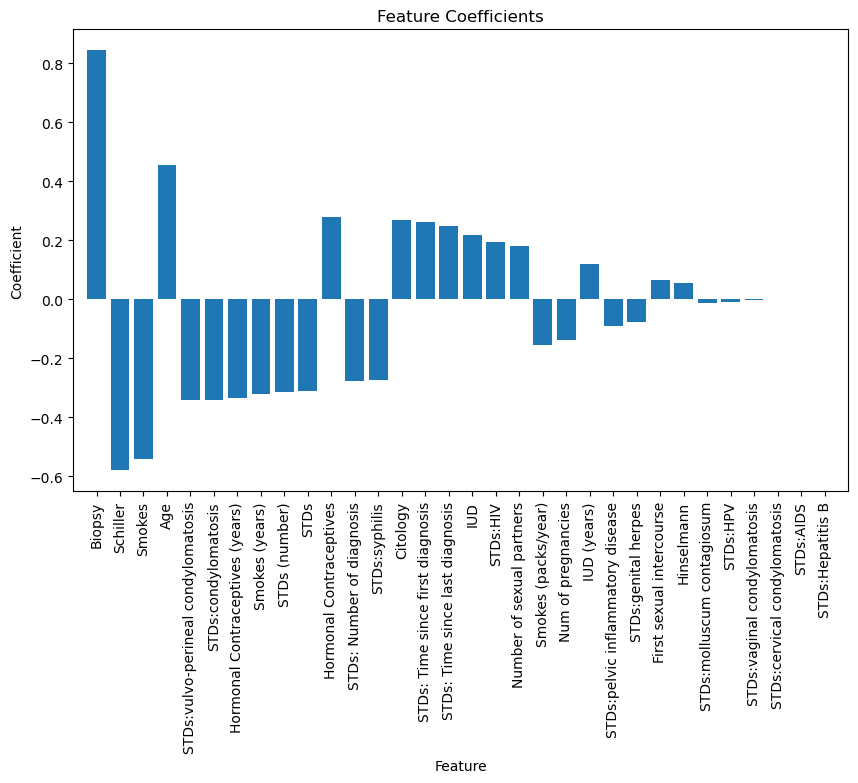

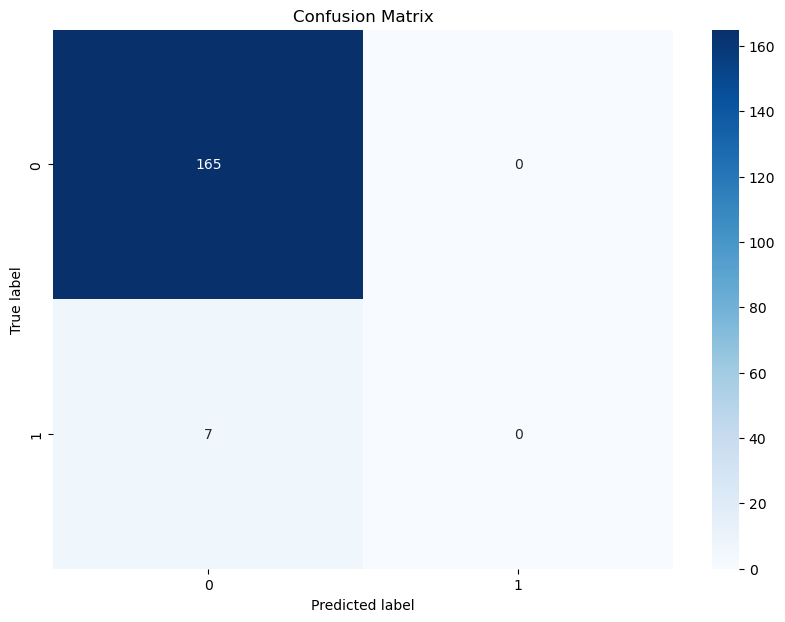

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       165
         1.0       0.00      0.00      0.00         7

    accuracy                           0.96       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.92      0.96      0.94       172

Model accuracy: 0.9593


D:\Anaconda\envs\ultra\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\ultra\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\envs\ultra\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# Assuming you already have your DataFrame 'df' ready and 'X' and 'y' defined
# Example: X = df.drop(columns=['dx']), y = df['dx']

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline that preprocesses the data and fits a RandomForest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', LogisticRegression(random_state=42, max_iter=200))
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.4f}')

# Step 10: Feature Importance Visualization
# Access the classifier from the pipeline
classifier = model.named_steps['classifier']

# Get feature coefficients for logistic regression
coefficients = classifier.coef_[0]  # Take the first row if it's a binary classifier
indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute value to get magnitude
features = np.array(X.columns)[indices]

# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.title('Feature Coefficients')
plt.bar(range(X.shape[1]), coefficients[indices], align='center')
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.show()
# Step 11: Confusion Matrix
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # For single-label classification
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Step 12: Classification Report
report = classification_report(y_test, y_pred)  # No need for target_names for binary/multi-class
print(report)
print(f'Model accuracy: {accuracy:.4f}')
